<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/robot_and_walls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

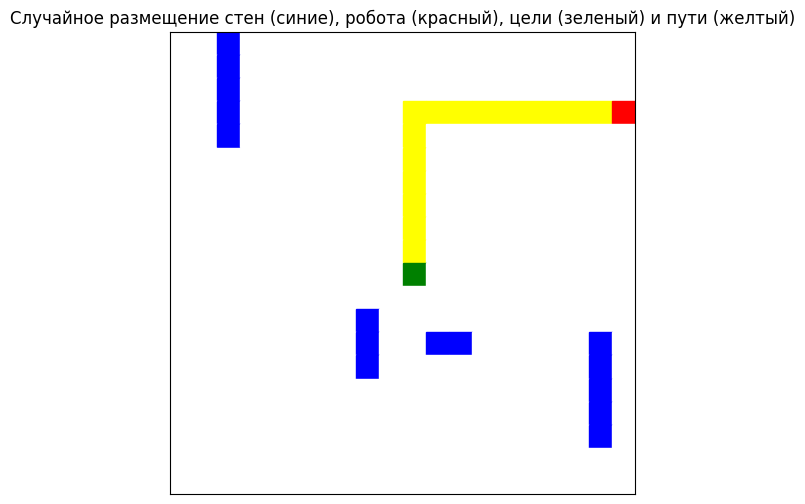

Финальный массив:
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 2]
 [0 0 1 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from queue import PriorityQueue

# Параметры среды
grid_size = 20
num_walls = 4  # Количество стен
max_wall_length = 10  # Максимальная длина стены

# Инициализируем пустой массив
environment = np.zeros((grid_size, grid_size), dtype=int)

# Центральная клетка
center = grid_size // 2
target_pos = (center, center)

# Функция для размещения случайных стен
def place_walls():
    for _ in range(num_walls):
        while True:
            # Случайно выбираем направление (горизонтальное или вертикальное)
            direction = random.choice(['horizontal', 'vertical'])

            # Случайная длина стены
            wall_length = random.randint(1, max_wall_length)

            # Случайные координаты начала стены
            if direction == 'horizontal':
                row = random.randint(0, grid_size - 1)
                col_start = random.randint(0, grid_size - wall_length)
                # Проверяем, не пересекает ли стена центральную клетку
                if not (row == center and col_start <= center < col_start + wall_length):
                    for col in range(col_start, col_start + wall_length):
                        environment[row, col] = 1  # Устанавливаем стену
                    break
            else:  # vertical
                col = random.randint(0, grid_size - 1)
                row_start = random.randint(0, grid_size - wall_length)
                # Проверяем, не пересекает ли стена центральную клетку
                if not (col == center and row_start <= center < row_start + wall_length):
                    for row in range(row_start, row_start + wall_length):
                        environment[row, col] = 1  # Устанавливаем стену
                    break

# Функция для размещения робота
def place_robot():
    while True:
        x = random.randint(0, grid_size - 1)
        y = random.randint(0, grid_size - 1)
        # Проверяем, что клетка свободна и не является центральной
        if environment[y, x] == 0 and (y, x) != target_pos:
            environment[y, x] = 2  # Устанавливаем робота
            return (y, x)  # Возвращаем координаты робота

# Функция для размещения цели (центральная точка)
def place_target():
    environment[target_pos[0], target_pos[1]] = 3  # Устанавливаем цель
    return target_pos

# Алгоритм A* для поиска пути
def a_star(start, goal):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    frontier = PriorityQueue()
    frontier.put((0, start))
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()[1]

        if current == goal:
            break

        for next in [(current[0] + 1, current[1]), (current[0] - 1, current[1]),
                     (current[0], current[1] + 1), (current[0], current[1] - 1)]:
            if 0 <= next[0] < grid_size and 0 <= next[1] < grid_size:
                if environment[next[0], next[1]] == 1:
                    continue  # Пропускаем препятствия
                new_cost = cost_so_far[current] + 1
                if next not in cost_so_far or new_cost < cost_so_far[next]:
                    cost_so_far[next] = new_cost
                    priority = new_cost + heuristic(goal, next)
                    frontier.put((priority, next))
                    came_from[next] = current

    # Восстанавливаем путь
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

# Размещаем стены, робота и цель
place_walls()
robot_pos = place_robot()
target_pos = place_target()

# Находим путь от робота к цели
path = a_star(robot_pos, target_pos)

# Отмечаем путь на карте
for (y, x) in path:
    if environment[y, x] == 0:  # Не перезаписываем робота и цель
        environment[y, x] = 4  # Помечаем путь

# Создаем график
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, grid_size)
ax.set_ylim(grid_size, 0)  # Инвертируем ось Y для правильного отображения

# Убираем оси
ax.set_xticks([])
ax.set_yticks([])

# Рисуем сетку с препятствиями, роботом, целью и путем
for i in range(grid_size):
    for j in range(grid_size):
        if environment[i, j] == 1:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='blue'))  # Стена
        elif environment[i, j] == 2:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='red'))   # Робот
        elif environment[i, j] == 3:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='green')) # Цель
        elif environment[i, j] == 4:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='yellow')) # Путь
        else:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color='white'))  # Пустое место

plt.title("Случайное размещение стен (синие), робота (красный), цели (зеленый) и пути (желтый)")
plt.show()

# Печатаем финальный массив после закрытия графика
print("Финальный массив:")
print(environment)